**Intern Name: Muhammad Danial

**Batch: GRIPSEPTEMBER23

**Domain: Data Science

**Task 2 : Prediction using Unsupervised ML
(Level - Beginner)
From the given 'Iris' dataset, predict the optimum number of clusters
and represent it visually.

**IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

**LOADING THE IRIS DATASET

In [3]:
def get_file_id(google_drive_link):
    return google_drive_link.split('/')[-2]

dataset_link = "https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view"

file_id = get_file_id(dataset_link)
data_url = f"https://drive.google.com/uc?id={file_id}"

# Loading the dataset into a Pandas DataFrame
data = pd.read_csv(data_url)

# Displaingy the first few rows of the dataset to understand its structure
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


**DETERMINING OPTIMUM NUMBER OF CLUSTERS

E:\Programming_Softwares\Anaconda\envs\DS_Env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Programming_Softwares\Anaconda\envs\DS_Env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Programming_Softwares\Anaconda\envs\DS_Env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Programming_Softwares\Anaconda\envs\DS_Env\Lib\site-packages\sklearn\c

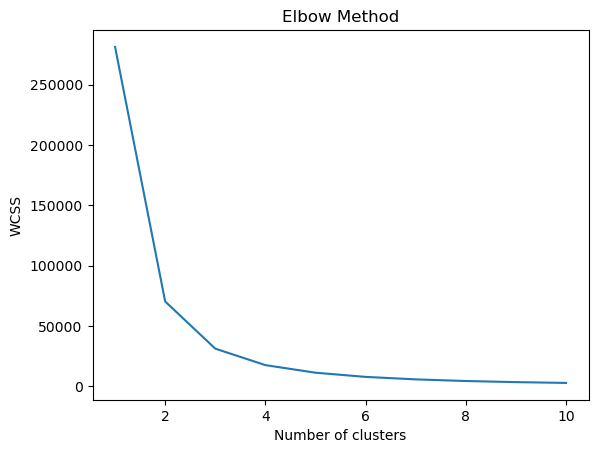

In [4]:
# Extracting features (sepal length and sepal width)
X = data.iloc[:, [0, 1]].values

# Initializing an empty list to store the WCSS values for different k values
wcss = []

# Trying k values from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting Graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

**FROM THE ELBOW METHOD GRAPH, SELECTING THE NUMBER OF CLUSTERS WHERE THE REDUCTION IN WCSS STARTS TO SLOW DOWN , SO PERFORMING K-MEANS CLUSTERING WITH 3 CLUSTERS

E:\Programming_Softwares\Anaconda\envs\DS_Env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


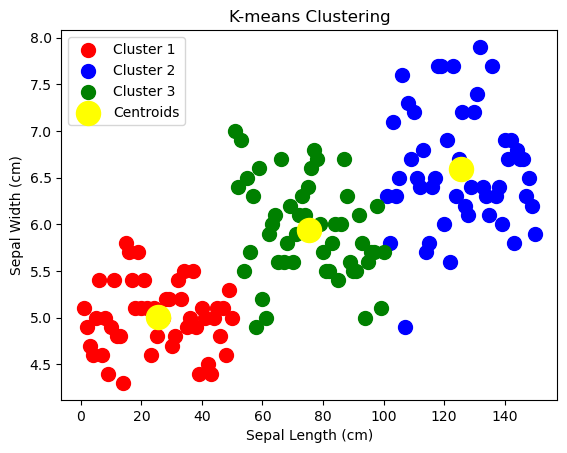

In [6]:
# Fitting K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')

# Plotting the centroids of each cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()